## Задание 1. Отклик колебательной системы с затуханием на гармоническое воздействие

Рассмотрим модель вынужденных колебаний простого пружинного маятника при гармонической внешней силе:
$$m \ddot x + f \dot x + k x = F_{0} \cos{\omega t},$$
где 
* $\omega$ — циклическая частота,
* $F_{0}$ — амплитуда колебаний внешней силы,
* $m$ — масса (кг),
* $f$ — коэффициент вязкого сопротивления (демпфирования, размерность [Н·с/м])
* $k$ — жёсткость пружины (размерность [Н/м]),

Решение указанного ЛНДУ можно представить в виде суммы решения ЛОДУ и частного решения. 

Используя `sympy` решим ЛНДУ в общем виде с нулевыми начальными условиями.

In [1]:
import sympy as sp

t = sp.Symbol('t', real=True, nonnegative=True)
m, f, k, F0, omega, t = sp.symbols("m f k F0 omega t", real=True, positive=True, nonnegative=True)
x = sp.Function("x")(t)

ode = sp.Eq(m*x.diff().diff() + f * x.diff() + k * x,  F0*sp.cos(omega*t))
xt = sp.dsolve(ode, x, ics = {x.subs(t, 0): 0, x.diff().subs(t, 0): 0})
xt

Eq(x(t), F0*f*omega*sin(omega*t)/(f**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4) + F0*k*cos(omega*t)/(f**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4) - F0*m*omega**2*cos(omega*t)/(f**2*omega**2 + k**2 - 2*k*m*omega**2 + m**2*omega**4) + (-F0*f*k/(2*f**2*omega**2*sqrt(f**2 - 4*k*m) + 2*k**2*sqrt(f**2 - 4*k*m) - 4*k*m*omega**2*sqrt(f**2 - 4*k*m) + 2*m**2*omega**4*sqrt(f**2 - 4*k*m)) - F0*f*m*omega**2/(2*f**2*omega**2*sqrt(f**2 - 4*k*m) + 2*k**2*sqrt(f**2 - 4*k*m) - 4*k*m*omega**2*sqrt(f**2 - 4*k*m) + 2*m**2*omega**4*sqrt(f**2 - 4*k*m)) - F0*k*sqrt(f**2 - 4*k*m)/(2*f**2*omega**2*sqrt(f**2 - 4*k*m) + 2*k**2*sqrt(f**2 - 4*k*m) - 4*k*m*omega**2*sqrt(f**2 - 4*k*m) + 2*m**2*omega**4*sqrt(f**2 - 4*k*m)) + F0*m*omega**2*sqrt(f**2 - 4*k*m)/(2*f**2*omega**2*sqrt(f**2 - 4*k*m) + 2*k**2*sqrt(f**2 - 4*k*m) - 4*k*m*omega**2*sqrt(f**2 - 4*k*m) + 2*m**2*omega**4*sqrt(f**2 - 4*k*m)))*exp(t*(-f + sqrt(f**2 - 4*k*m))/(2*m)) + (F0*f*k/(2*f**2*omega**2*sqrt(f**2 - 4*k*m) + 2*k**2*sqrt(f**2 - 4

Для демонстрации подставим в решение следующие значения параметров и построим график решения.

In [2]:
xt_test1 = xt.subs(m,1).subs(F0,1).subs(f,1).subs(k,1).subs(omega,1)
xt_test1

Eq(x(t), sqrt(3)*I*exp(t*(-1 + sqrt(3)*I)/2)/3 + sin(t) - sqrt(3)*I*exp(-t*(1 + sqrt(3)*I)/2)/3)

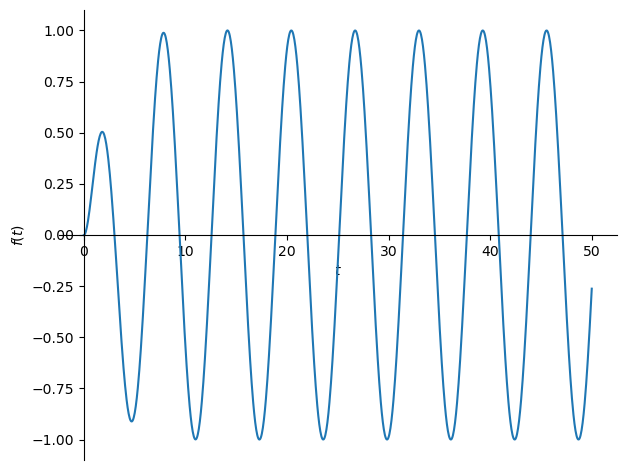

In [3]:
p = sp.plot(xt_test1.rhs, (t,0,50), show=False)
p.show()

Подставим другие параметры:

In [4]:
xt_test2 = xt.subs(m,1).subs(F0,1).subs(f,1).subs(k,0.1).subs(omega,1)
xt_test2

Eq(x(t), 0.552486187845304*sin(t) - 0.497237569060773*cos(t) + 0.640909915361709*exp(-0.887298334620742*t) - 0.143672346300935*exp(-0.112701665379258*t))

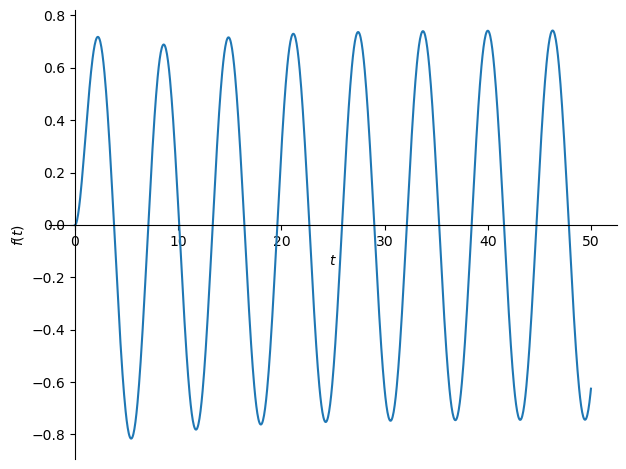

In [5]:
p = sp.plot(xt_test2.rhs, (t,0,50), show=False)
p.show()

Рассматриваемое уравнение является ЛНДУ с постоянными коэффициентами. Общее решение равно сумме общего решения соответствующего однородного уравнения и частного решения неоднородного уравнения. 

Гармоническая внешняя сила в линейной системе порождает отклик той же частоты, но с другой амплитудой и фазой. Новые частоты не возникают из-за линейности уравнения. Поэтому отклик обязательно будет той же частоты, но с другими параметрами (амплитудой и фазой). Это ключевое следствие **линейности** системы. Если на вход линейной системы подать сигнал частоты $\omega$, то на выходе в установившемся режиме может быть только сигнал той же частоты.

Предположим частное решение в виде:
$$\displaystyle x_{p} = X \cos{(\omega t - \Phi)},$$

где
* $X$ — амплитуда установившихся колебаний,
* $\Phi$ — фазовый сдвиг.

Определим обе величины используя `sympy`.

In [6]:
X, Phi = sp.symbols('X Phi', real=True)
x_p = X * sp.cos(omega*t - Phi)
x_p

X*cos(Phi - omega*t)

Найдем производные и подставим в уравнение.

In [7]:
x_p_dot = sp.diff(x_p, t)
x_p_ddot = sp.diff(x_p, t, t)
lhs = m * x_p_ddot + f * x_p_dot + k * x_p
rhs = F0 * sp.cos(omega*t)
eq_check = sp.Eq(lhs, rhs)
eq_check

Eq(X*f*omega*sin(Phi - omega*t) + X*k*cos(Phi - omega*t) - X*m*omega**2*cos(Phi - omega*t), F0*cos(omega*t))

Раскладываем $\cos{(\omega t - \Phi)}$ и $\sin{(\omega t - \Phi)}$, используя известные тригонометрические формулы:
$$\cos{(\omega t - \Phi)} = \cos{(\omega t)} \cos{(\Phi)} + \sin{(\omega t)} \sin{(\Phi)},$$
$$\sin{(\omega t - \Phi)} = \sin{(\omega t)} \cos{(\Phi)} - \cos{(\omega t)} \sin{(\Phi)}.$$


In [8]:
lhs_expanded = sp.expand_trig(lhs)
lhs_expanded

X*f*omega*(sin(Phi)*cos(omega*t) - sin(omega*t)*cos(Phi)) + X*k*(sin(Phi)*sin(omega*t) + cos(Phi)*cos(omega*t)) - X*m*omega**2*(sin(Phi)*sin(omega*t) + cos(Phi)*cos(omega*t))

In [9]:
A = sp.simplify(sp.expand(lhs_expanded.expand().coeff(sp.cos(omega*t), 1)))
A

X*(f*omega*sin(Phi) + k*cos(Phi) - m*omega**2*cos(Phi))

В выражении выше можно вынести $\cos{(\Phi)}$ за скобки, сохранив уравнение:
$$X[f\omega\sin{(\Phi)} + (k - m \omega^{2}) \cos{(\Phi)}] = F_{0} \cos{(\Phi)}.$$

Тождество выше можно представить как 
$$C_1 \cos{(\omega t)} + C_2 \sin{(\omega t)} = F_{0} \cos{(\omega t)},$$
где
* $C_1 = X[(k-m\omega^2)\cos{(\Phi)} + f \omega \sin{(\Phi)}],$
* $C_2 = X[(k-m\omega^2)\sin{(\Phi)} - f \omega \cos{(\Phi)}].$

Если перенести $F_0 \cos{(\omega t)}$ в левую часть уравнения, то получится выражение вида:
$$(C_1-F_0) \cos{(\omega t)} + C_2 \sin{(\omega t)} = 0.$$

Функции $\cos{(\omega t)}$ и $\sin{(\omega t)}$ линейно независимы (никакая константа не умноженная на них не даст тождественно ноль, кроме тривиального случая). Следовательно тождество возможно только если коэффициенты при каждой из них равны нулю:

\begin{align}
\left\{
        \begin{array}{l}
        \displaystyle C_1 - F_0 = 0, \\
        \displaystyle C_2 = 0.
        \end{array}
        \right.
\end{align}

Подставив $C_1$ и $C_2$ получаем:
\begin{align}
\left\{
        \begin{array}{l}
        \displaystyle X[(k-m\omega^2)\cos{(\Phi)} + f \omega \sin{(\Phi)}] = F_0, \\
        \displaystyle X[(k-m\omega^2)\sin{(\Phi)} - f \omega \cos{(\Phi)}] = 0.
        \end{array}
        \right.
\end{align}

Решением системы для $X$ и $\Phi$ являются следующие выражения:
$$\displaystyle X = \frac{F_0}{\sqrt{(k-m\omega^2)^2+f^2 \omega^2}}, \qquad \Phi = \arctan{\Big(\frac{f\omega}{k-m\omega^2}\Big)}.$$

Проверим найденные решения.

In [10]:
X = F0 / sp.sqrt((k - m*omega**2)**2 + (f*omega)**2)
X

F0/sqrt(f**2*omega**2 + (k - m*omega**2)**2)

In [11]:
Phi = sp.atan(f*omega / (k - m*omega**2))
Phi

atan(f*omega/(k - m*omega**2))

In [12]:
x = X * sp.cos(omega*t - Phi)
x

F0*cos(omega*t - atan(f*omega/(k - m*omega**2)))/sqrt(f**2*omega**2 + (k - m*omega**2)**2)

Найдем производные.

In [13]:
x_dot = sp.diff(x, t)
x_ddot = sp.diff(x_dot, t)

In [14]:
lhs = sp.simplify(m*x_ddot + f*x_dot + k*x)
lhs

F0*cos(omega*t)*Abs(k - m*omega**2)/(k - m*omega**2)

В решении выше амплитуда $X$ по определению положительна (в знаменателе всё в квадрате). Знак выражения $k-m\omega^2$ учитывается в фазовом сдвиге $\Phi$. Поэтому амплитуда $X$ всегда положительна, а знак $k-m\omega^2$ учитывается в фазовом сдвиге $\Phi$, что корректно отражает физический отклик системы.

In [15]:
lhs = sp.simplify((m*x_ddot + f*x_dot + k*x).rewrite(sp.sqrt)).subs(sp.Abs(k - m*omega**2), (k - m*omega**2))
lhs

F0*cos(omega*t)

---
Вернемся к начальному уравнению:
$$m \ddot x + f \dot x + k x = F_{0} \cos{\omega t},$$
и преобразуем его к следующему виду:
$$\displaystyle \ddot x + \frac{f}{m} \dot x + \frac{k}{m} x = \frac{F_{0}}{m} \cos{\omega t},$$

Частота собственных (свободных) колебаний системы без демпфирования и без внешней силы: $\omega_n = \sqrt{k/m}$. 

Сопротивление, при котором система ещё не колеблется, а возвращается к равновесию без осцилляций (критическое демпфирование) обозначим как $f_c = 2 \sqrt{km}$.

Введем коэффициент затухания (демпфирования): $\displaystyle \zeta = \frac{f}{f_c} = \frac{f}{2\sqrt{km}}$. Очевидно, что при $\zeta = 0$ получаются гармонические колебания.

Введем $\displaystyle \delta = \frac{F_0}{k}$ и $\displaystyle r = \frac{\omega}{\omega_n}$, где $\omega$ — частота силы внешнего воздействия.

Перепишем $X$ и $\Phi$ в зависимости от введенных параметров.

$$ X = \frac{F_0}{\sqrt{(k - m\omega^2)^2 + (f\omega)^2}}, \qquad \Phi = \arctan\!\frac{f\omega}{k - m\omega^2}.$$


---

Выразим $X / \delta$. Начнём с:

$$\frac{X}{\delta} = \frac{X}{F_0/k} = \frac{k}{\sqrt{(k - m\omega^2)^2 + (f\omega)^2}}.$$

Разделим числитель и знаменатель на $k$: 

$$\frac{X}{\delta} = \frac{1}{\sqrt{\left(\frac{k - m\omega^2}{k}\right)^2 + \left(\frac{f\omega}{k}\right)^2}}.$$

Упростим выражения:

$$ \frac{k - m\omega^2}{k} = 1 - \frac{m\omega^2}{k} = 1 - \frac{\omega^2}{\omega_n^2}.$$

Для второго слагаемого:

$$\frac{f\omega}{k}= \frac{f}{2\sqrt{km}}   \cdot \frac{2\sqrt{km}\,\omega}{k}= \zeta \cdot \frac{2\sqrt{km}\,\omega}{k}.$$

Так как

$$\frac{2\sqrt{km}}{k} = 2\sqrt{\frac{m}{k}} = \frac{2}{\sqrt{k/m}} = \frac{2}{\omega_n},$$

то

$$\frac{f\omega}{k} = 2\zeta\frac{\omega}{\omega_n} = 2 \zeta r.$$

Подставляем всё:

$$\frac{X}{\delta} = \frac{1}{\sqrt{\Big(1 - \displaystyle \frac{\omega^2}{\omega_n^2}\Big)^2 + (2\zeta r)^2}} = \frac{1}{\sqrt{(1 - r^2)^2 + (2 \zeta r)^2}}$$


---

Выражение для $\Phi$. Начнём с:
$$ \tan\Phi = \frac{f\omega}{k - m\omega^2}.$$

Разделим числитель и знаменатель на $k$:
$$ \tan\Phi = \frac{\dfrac{f\omega}{k}}{\dfrac{k - m\omega^2}{k}} = \frac{2\zeta r}{1 - \dfrac{\omega^2}{\omega_n^2}} = \frac{2\zeta r}{1 - r^2}. $$

Следовательно:
$$\Phi = \arctan\!\frac{2\zeta r}{1 - r^2}.$$

---

Итоговые выражения

$$ \frac{X}{\delta} = \frac{1}{\sqrt{(1 - r^2)^2 + (2\zeta r)^2}}, \qquad
\Phi = \arctan\!\frac{2\zeta r}{1 - r^2},$$

где
$$\delta = \frac{F_0}{k}, \qquad r = \frac{\omega}{\omega_n}, \qquad \omega_n = \sqrt{\frac{k}{m}}, \qquad \zeta = \frac{f}{2\sqrt{km}}.$$

Отношение $\displaystyle M = \frac{X}{\delta}$ называется коэффициентом динамического усиления  (коэффициентом усиления, амплитудным коэффициентом, коэффициентом динамичности, amplification factor, magnification factor, amplitude ratio). Это выражение показывает, как амплитуда установившихся колебаний зависит от отношения частот $r=\omega / \omega_{n}$ и коэффициента демпфирования $\zeta$. На рисунке ниже продемонстрированы $X$ для различных значений $\zeta$ в зависимости от $r$. Как видно на рисунке резонанс максимален в случае $\zeta = 0$ при $r = \omega / \omega_{n} = 1$.

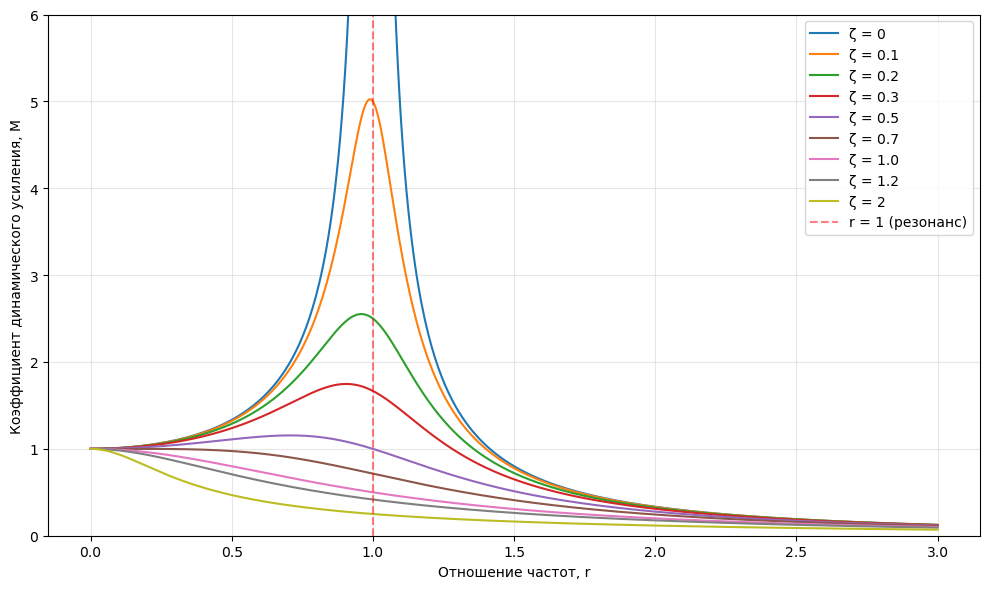

In [16]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

r, zeta = sp.symbols('r zeta', real=True, nonnegative=True)

# Формула коэффициента динамического усиления
beta = 1 / sp.sqrt((1 - r**2)**2 + (2*zeta*r)**2)

# Создаем числовую функцию
beta_func = sp.lambdify((r, zeta), beta, 'numpy')

# Диапазон отношений частот
r_values = np.linspace(0, 3, 500)

# Разные значения коэффициента демпфирования
zeta_values = [0, 0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.2, 2]

plt.figure(figsize=(10, 6))

for zeta_val in zeta_values:
    beta_values = beta_func(r_values, zeta_val)
    plt.plot(r_values, beta_values, label=f'ζ = {zeta_val}')

plt.xlabel('Отношение частот, r')
plt.ylabel('Коэффициент динамического усиления, M')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(0, 6)
plt.axvline(x=1, color='red', linestyle='--', alpha=0.5, label='r = 1 (резонанс)')
plt.legend()
plt.tight_layout()
plt.show()

Приведем уравнение:

$$\displaystyle \ddot x + \frac{f}{m} \dot x + \frac{k}{m} x = \frac{F_{0}}{m} \cos{\omega t},$$

к канонической форме с явным коэффициентом демпфирования $\zeta$. Так как собственная частота $\displaystyle \omega_{n} = \sqrt{\frac{k}{m}}$, тогда $\displaystyle \frac{k}{m} = \omega_{n}^2$. Используя критическое демпфирование: $f_{c} = 2 \sqrt{km}$ и коэффициент демпфирования:

$$\displaystyle \zeta = \frac{f}{f_c} = \frac{f}{2\sqrt{km}} = \frac{f}{2 m \omega_{n}}.$$

Подставляем эти выражения, получаем уравнение:

$$\displaystyle \ddot x + 2 \zeta \omega_{n} \dot x + \omega_{n}^2 x = \frac{F_{0}}{m} \cos{\omega t}.$$

Возможны следующие значения $\zeta$:
* $0 < \zeta < 1$ - колебания с убывающей амплитудой (подкритическое затухание);
* $\zeta = 1$ - критическое затухание (система быстро возвращается в равновесие без колебаний);
* $\zeta > 1$ - надкритическое затухание (overdamped case, так как система возвращается к равновесию медленно).

Следует отметить, что в колебательных системах параметр $\zeta$ один из ключевых параметров при проектировании устойчивых динамических систем. Краткая суть следующая: если демпфирование слишком большое, то система станет медленно реагировать на внешнее воздействие, а если слишком маленькое, то возникнут большие колебания, особенно около резонанса. Однако, оптимальный диапазон значений параметра и соответствующая зона "демпфирования", зависит от задачи. Например, в автомобильной подвеске требуется компромисс между комфортом и управляемостью, поэтому оптимальный коэффициент демпфирования выбирается так, чтобы обеспечивать небольшие колебания при больших ходах. В виброопорах зданий амплитуда колебаний ограничена, поэтому выбирается достаточно высокое демпфирование для быстрого гашения колебаний.

Продемонстрируем изменение фазового сдвига $\Phi$ в вынужденных колебаниях для разных коэффициентов демпфирования $\zeta$. Фазовый сдвиг $\Phi$ — это угол, на который отклик системы $x(t)$ запаздывает относительно внешней гармонической силы $F(t) = F_0 \cos(\omega t)$.

Физическая интерпретация:
* при малых частотах $r \ll 1$ фазовый сдвиг близок к нулю: система почти следует за внешней силой без запаздывания;
* при резонансе $r \approx 1$ фазовый сдвиг около $\pi/2$: амплитуда отклика максимальна, система запаздывает на четверть периода;  
* при высоких частотах $r \gg 1$ фазовый сдвиг стремится к $\pi$: отклик почти противоположен внешней силе.

Влияние демпфирования:
* малое $\zeta$ - резкий переход фазы около резонанса;  
* большое $\zeta$ - плавный переход, резонансный пик размывается;
* очень сильное демпфирование $\zeta > 1$ - кривая фазы смещается вверх и выравнивается.

Фазовый сдвиг показывает запаздывание отклика. В инженерных системах важно учитывать фазу при синхронизации сигналов, проектировании гасителей колебаний, управлении механическими или виброустойчивыми конструкциями.

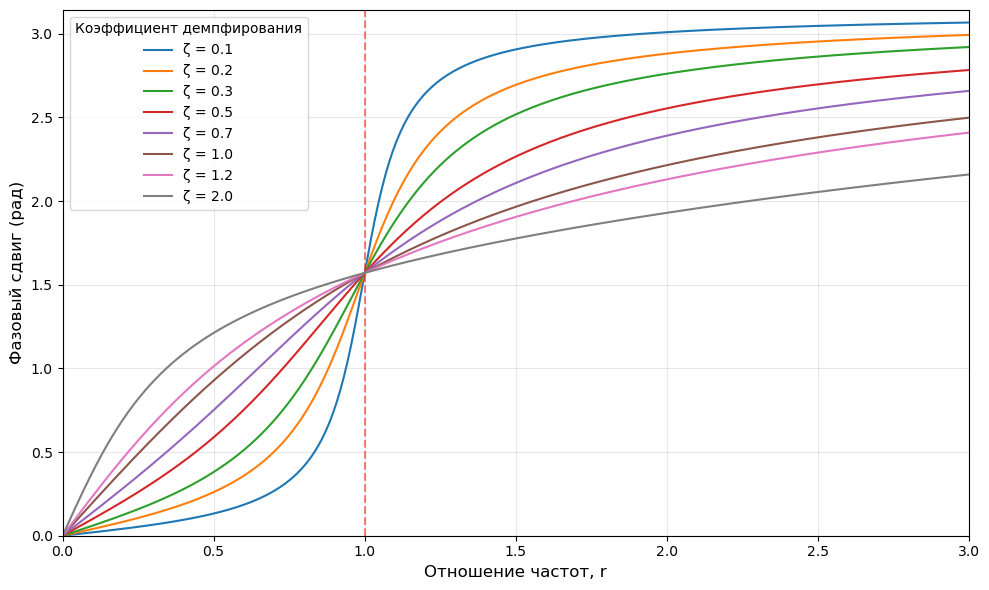

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Диапазон отношений частот
r_values = np.linspace(0, 3, 500)

# Разные значения коэффициента демпфирования
zeta_values = [0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.2, 2.0]

plt.figure(figsize=(10, 6))

for zeta in zeta_values:
    # Физически корректное определение фазы (в диапазоне 0...Pi)
    phi = np.arctan2(2*zeta*r_values, 1 - r_values**2)
    phi = np.where(phi < 0, phi + np.pi, phi)  # перевод отрицательных значений в диапазон [0, Pi]
    
    plt.plot(r_values, phi, label=f'ζ = {zeta}')

plt.xlabel('Отношение частот, r', fontsize=12)
plt.ylabel('Фазовый сдвиг (рад)', fontsize=12)
plt.ylim(0, np.pi)
plt.xlim(0, 3)
plt.grid(True, alpha=0.3)
plt.legend(title='Коэффициент демпфирования')
plt.axvline(x=1, color='red', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

---

**Задание**

В реальных механических и инженерных системах внешняя сила редко имеет строго синусоидальный характер, поэтому часто приходится анализировать отклик системы на произвольные воздействия. Для анализа динамических свойств и проектирования демпфирующих элементов полезно рассматривать реакцию системы на различные типы возбуждений.

Рассмотрим систему с одной степенью свободы, под действием внешней силы $F(t)$, описываемую уравнением:

$$ m \ddot{x} + f \dot{x} + kx = F(t).$$

Параметры системы.

```
m = 1.0       # масса
k = 100.0     # жесткость
F0 = 1.0      # амплитуда внешней силы
omega_n = np.sqrt(k / m)   # собственная (натуральная) частота системы
```

В задании требуется.
1. Пусть внешняя сила имеет вид гармонического воздействия:
$$ F(t) = F_0 \cos(\omega t) $$

Постройте график коэффициента динамического усиления $M$ в зависимости от частотного отношения $r = \omega / \omega_n$ при различных значениях коэффициента демпфирования $\zeta$. Сравните полученные численные результаты с аналитическим выражением для коэффициента динамического усиления.

2. Негармоническое (составное) воздействие. Рассмотрите силу вида:
$$ F(t) = F_0 \, |\cos(\omega t)| \, \sin(2\omega t).$$

Численно найдите амплитуду установившихся колебаний системы при различных частотных отношениях $r = \omega / \omega_n$ и коэффициентах демпфирования $\zeta$. Постройте график зависимости коэффициента динамического усиления 
$$\beta = \frac{X}{\delta}, \quad \text{где } \delta = \frac{F_0}{k},$$
от $r$ для нескольких значений $\zeta$.
Сравните поведение системы при гармоническом и негармоническом воздействии. 
* смещение резонансной частоты;
* изменение формы кривой;
* появление дополнительных локальных максимумов.

3. Рассмотрите другие формы внешнего воздействия. Опишите в комментариях возникающие эффекты.
* $F(t) = F_0 e^{-0.1t} \sin(\omega t),$
* $F(t) = F_0 \sin^3(\omega t),$
* $F(t) = F_0 (\cos(\omega t) + 0.5\sin(3\omega t)).$